# Predicting Facebook Post Total Contributions
## Phase 1: Data Preparation & Visualisation
### Shaun Cauchi 
***

## Table of Contents
* [Introduction](#itr) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)

## Introduction <a id='itr'></a>

### Dataset Source

The Facebook Metrics dataset used in the study was sourced from UCI (Moro et al. 2016). It contains related Facebook post information and metrics of a popular cosmetics brand during 2014.



### Dataset Details

The dataset is about the post metrics of a singular cosmetics brand’s Facebook page and contains information about its posts as well as all impressions for the post and page during 2014. The dataset also contains additional features, such as the total page likes, type of post, content of the post (category);  month, day, and hour of the post; if the company paid Facebook for advertising on the post;  number of likes, comments, shares, and the sum of them on the post; as well as numerous features pertaining to the lifetime interactions of the post.
There are a total of 19 features with 500 observations. 7 of the features were known prior to the publication of the posts while 12 features were created by the journal to evaluate the impact of each post (Moro et al. 2016).

**Dataset Retrieval**

- The dataset is read in from the GitHub repository provided by the course and all relevant modules are loaded in.
- 10 randomly sampled rows are displayed from the dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

pd.set_option('display.max_columns', None) 

In [2]:
# name of the dataset to be imported from the provided GitHub account
df_name = 'fb_metrics.csv'

In [3]:
df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/' + df_name
url_content = requests.get(df_url, verify=False).content
fb_df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [4]:
fb_df.sample(10, random_state=999)

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
195,133594,Photo,2,8,6,10,0.0,5282,8730,703,530,772,5123,3244,470,9,278.0,43.0,330
417,104070,Photo,1,3,3,10,0.0,1874,2474,25,25,31,1483,1062,15,0,0.0,0.0,0
478,86909,Photo,3,1,5,13,0.0,5536,8745,1141,1099,1461,5225,3098,483,1,74.0,31.0,106
280,126345,Photo,2,6,1,12,0.0,3212,4908,735,720,897,3399,2162,375,1,40.0,8.0,49
95,137059,Photo,3,10,6,10,0.0,3090,5744,391,257,360,3521,1796,293,5,153.0,27.0,185
400,107907,Photo,3,4,4,5,1.0,3714,6385,537,481,645,4441,2512,395,5,91.0,26.0,122
443,96749,Photo,3,3,2,9,0.0,5338,9940,589,556,715,8146,3920,363,1,62.0,10.0,73
374,113028,Photo,1,4,4,12,1.0,6880,11736,671,639,889,9389,5232,556,0,59.0,16.0,75
284,126141,Photo,1,6,6,12,0.0,28112,47721,1631,1537,2438,41207,23440,1225,11,129.0,12.0,152
240,130791,Photo,3,7,5,3,0.0,19968,35161,1016,592,909,26701,14792,757,6,535.0,83.0,624


### Dataset Features

The features and their descriptions are sourced from the UCI data source. They are described in the table below.

In [5]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['Page total likes', 'Numeric', 'NA', "Number of people who have liked the company's page."],
         ['Type', 'Nominal categorical', 'NA', 'Type of post - Link, Photo, Status, Video.'],
         ['Category', 'Nominal Categorical', 'NA', 'Manual content characterization: action (special offers and contests),product (direct advertisement, explicit brand content), and \ninspiration (non-explicit brand related content).'],
         ['Post Month', 'Date', 'month', 'Month the post was published (January, February, March, …, December).' ],
         ['Post Weekday', 'Date', 'day', 'Weekday the post was published (Sunday, Monday, …, Saturday).' ],
         ['Post Hour', 'Numeric', 'NA', 'Hour the post was published (0, 1, 2, 3, 4, …, 23).' ],
         ['Paid', 'Binary', 'NA', 'If the company paid to Facebook for advertising (yes, no).'],
         ['Total interactions', 'Numeric', 'NA', 'The sum of “likes,” “comments,” and “shares” of the post.']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════╤═════════════════════╤═════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Name               │ Data Type           │ Units   │ Description                                                                                                                        │
╞════════════════════╪═════════════════════╪═════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Page total likes   │ Numeric             │ NA      │ Number of people who have liked the company's page.                                                                                │
├────────────────────┼─────────────────────┼─────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Type               │ Nominal categorical │ NA      │ Type 

### Target Feature

In the case of this project, the total interactions will be the target feature to be predicted based on the other features. It is the sum of  “likes,” “comments,” and “shares”, and therefore is seen as a feature worth predicting.

## Goals and Objectives

Facebook is one of the most popular social media platforms in the whole world with a large amount of small and large brands utilising it as a form of advertising and business. A model that can accurately predict the total interactions a post will have and provide information on the amount of impact that certain factors have on a post’s usefulness could be valuable. Smaller businesses with a relatively minor marketing budget could determine if paying Facebook advertising to promote their post more would be beneficial or a waste of funds. Likewise, non-financial aspects like the day and hour of the post could be identified as vastly important to a post’s performance and could benefit all brands and influencers looking to grow their presence in the digital landscape. Furthermore, Facebook’s algorithm has always been up for debate in regards to what factors influence the amount of user engagement a post receives and an accurate model could help shed light on this.

Due to these goals, the main objective of this project is to firstly predict the total interactions a post on Facebook will receive based on features present for everyone on the platform, and secondly to determine which features have the largest impact on a post’s performance.

Although all the posts were published by the one cosmetics company, and therefore they are related to each other, there must be an assumption that there is no correlation between the rows in the dataset. Specifically, posts are assumed to be independent and have no impact on one another in the dataset. Although this is unrealistic as there are time series aspects associated with Facebook posts, assuming there isn’t allows for the inclusion of traditional predictive models in the report.


## Data Cleaning and Preprocessing

In this section of the report, the dataset is required to be cleaned in order to be made ready for analysis.

### Data Cleaning Steps

* Drop irrelevant features from the dataset
* Check for missing values
* Replace missing values
* Check for Outliers
* Remove outliers from the dataset for accuracy

All columns appear to be present in the dataset.

In [6]:
fb_df.columns

Index(['page_total_likes', 'type', 'category', 'post_month', 'post_weekday',
       'post_hour', 'paid', 'lifetime_post_total_reach',
       'lifetime_post_total_impressions', 'lifetime_engaged_users',
       'lifetime_post_consumers', 'lifetime_post_consumptions',
       'lifetime_post_impressions_by_people_who_have_liked_your_page',
       'lifetime_post_reach_by_people_who_like_your_page',
       'lifetime_people_who_have_liked_your_page_and_engaged_with_your_post',
       'comment', 'like', 'share', 'total_interactions'],
      dtype='object')

All “lifetime” features are not useful for modelling within phase 2 of the report as they are recorded after publishing a post and therefore need to be dropped. They have no relevance in the creation of the post prior to its publishing. Comment, Like, and Share are all redundant as they are all already present within Total Interactions which is the main focus of the report.

In [7]:
#drop irrelevent columns
fb_df = fb_df.drop(columns=['lifetime_post_total_reach','lifetime_post_total_impressions', 'lifetime_engaged_users',
       'lifetime_post_consumers', 'lifetime_post_consumptions',
       'lifetime_post_impressions_by_people_who_have_liked_your_page',
       'lifetime_post_reach_by_people_who_like_your_page',
       'lifetime_people_who_have_liked_your_page_and_engaged_with_your_post',
       'comment', 'like', 'share'])

In [8]:
fb_df.columns = fb_df.columns.str.lower().str.strip()

As all the datatypes match up with their feature there is no need for adjustments.

In [9]:
# Check for data types
print(f"Shape of the dataset = {fb_df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(fb_df.dtypes)

Shape of the dataset = (500, 8) 

Data types are below where 'object' indicates a string type: 
page_total_likes        int64
type                   object
category                int64
post_month              int64
post_weekday            int64
post_hour               int64
paid                  float64
total_interactions      int64
dtype: object


Again, there is no need for adjustments as the categorical feature Type has no data quality issues.

In [10]:
# To see all unique values for categorical data types
fb_df['type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: type, dtype: int64

As can be seen in Table 1, Total Interactions has a relatively high max which may suggest there are outliers present within the feature, however the other features appear to be devoid of any outliers.

In [11]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of numerical features</b>'))
fb_df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
page_total_likes,500.0,123194.176000,16272.813214,81370.0,112676.0,129600.0,136393.0,139441.0
category,500.0,1.880000,0.852675,1.0,1.0,2.0,3.0,3.0
post_month,500.0,7.038000,3.307936,1.0,4.0,7.0,10.0,12.0
post_weekday,500.0,4.150000,2.030701,1.0,2.0,4.0,6.0,7.0
post_hour,500.0,7.840000,4.368589,1.0,3.0,9.0,11.0,23.0
paid,499.0,0.278557,0.448739,0.0,0.0,0.0,1.0,1.0
total_interactions,500.0,212.120000,380.233118,0.0,71.0,123.5,228.5,6334.0


Due to values closer to the max seemingly being outliers, any variables above the 90th percentile are to be removed to improve the accuracy of the dataset.

In [12]:
outlierCut = np.percentile(fb_df['total_interactions'],90)
outlierCut

409.1

In [13]:
fb_df = fb_df[fb_df['total_interactions']<outlierCut]

By displaying missing values, there appears to only be one present, which is in Paid. As Paid is binary and there is only one missing value, it is replaced with 0. 

In [14]:
#display missing values present in each column
print(f"\nMissing values count")
print(fb_df.isnull().sum())


Missing values count
page_total_likes      0
type                  0
category              0
post_month            0
post_weekday          0
post_hour             0
paid                  1
total_interactions    0
dtype: int64


After the dataset has been cleaned and preprocessed, the amount of rows present has been reduced to 450.

In [15]:
#Fill NAN rows and show new dataframe dimensions
fb_df['paid'].fillna(0,inplace=True)
fb_df.shape

(450, 8)

5 random rows of cleaned data are displayed to ensure there are no further data issues present.

In [16]:
fb_df.sample(5, random_state=999)

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,total_interactions
482,86491,Photo,3,1,3,10,0.0,226
8,139441,Status,2,12,7,3,0.0,192
207,132201,Photo,2,8,7,10,0.0,162
433,100732,Photo,1,3,6,17,0.0,237
252,129600,Photo,3,7,6,5,0.0,274


## Data Exploration and Visualisation

The dataset is now clean and is therefore ready for exploration and visualisation.

### Univariate Visualisation



#### Bar Chart of Type

The post type is provided as a count to determine which type of post is most frequently used. Figure 1 shows that photos are the predominant post type, with it severely dwarfing even the sum of the 3 other types.

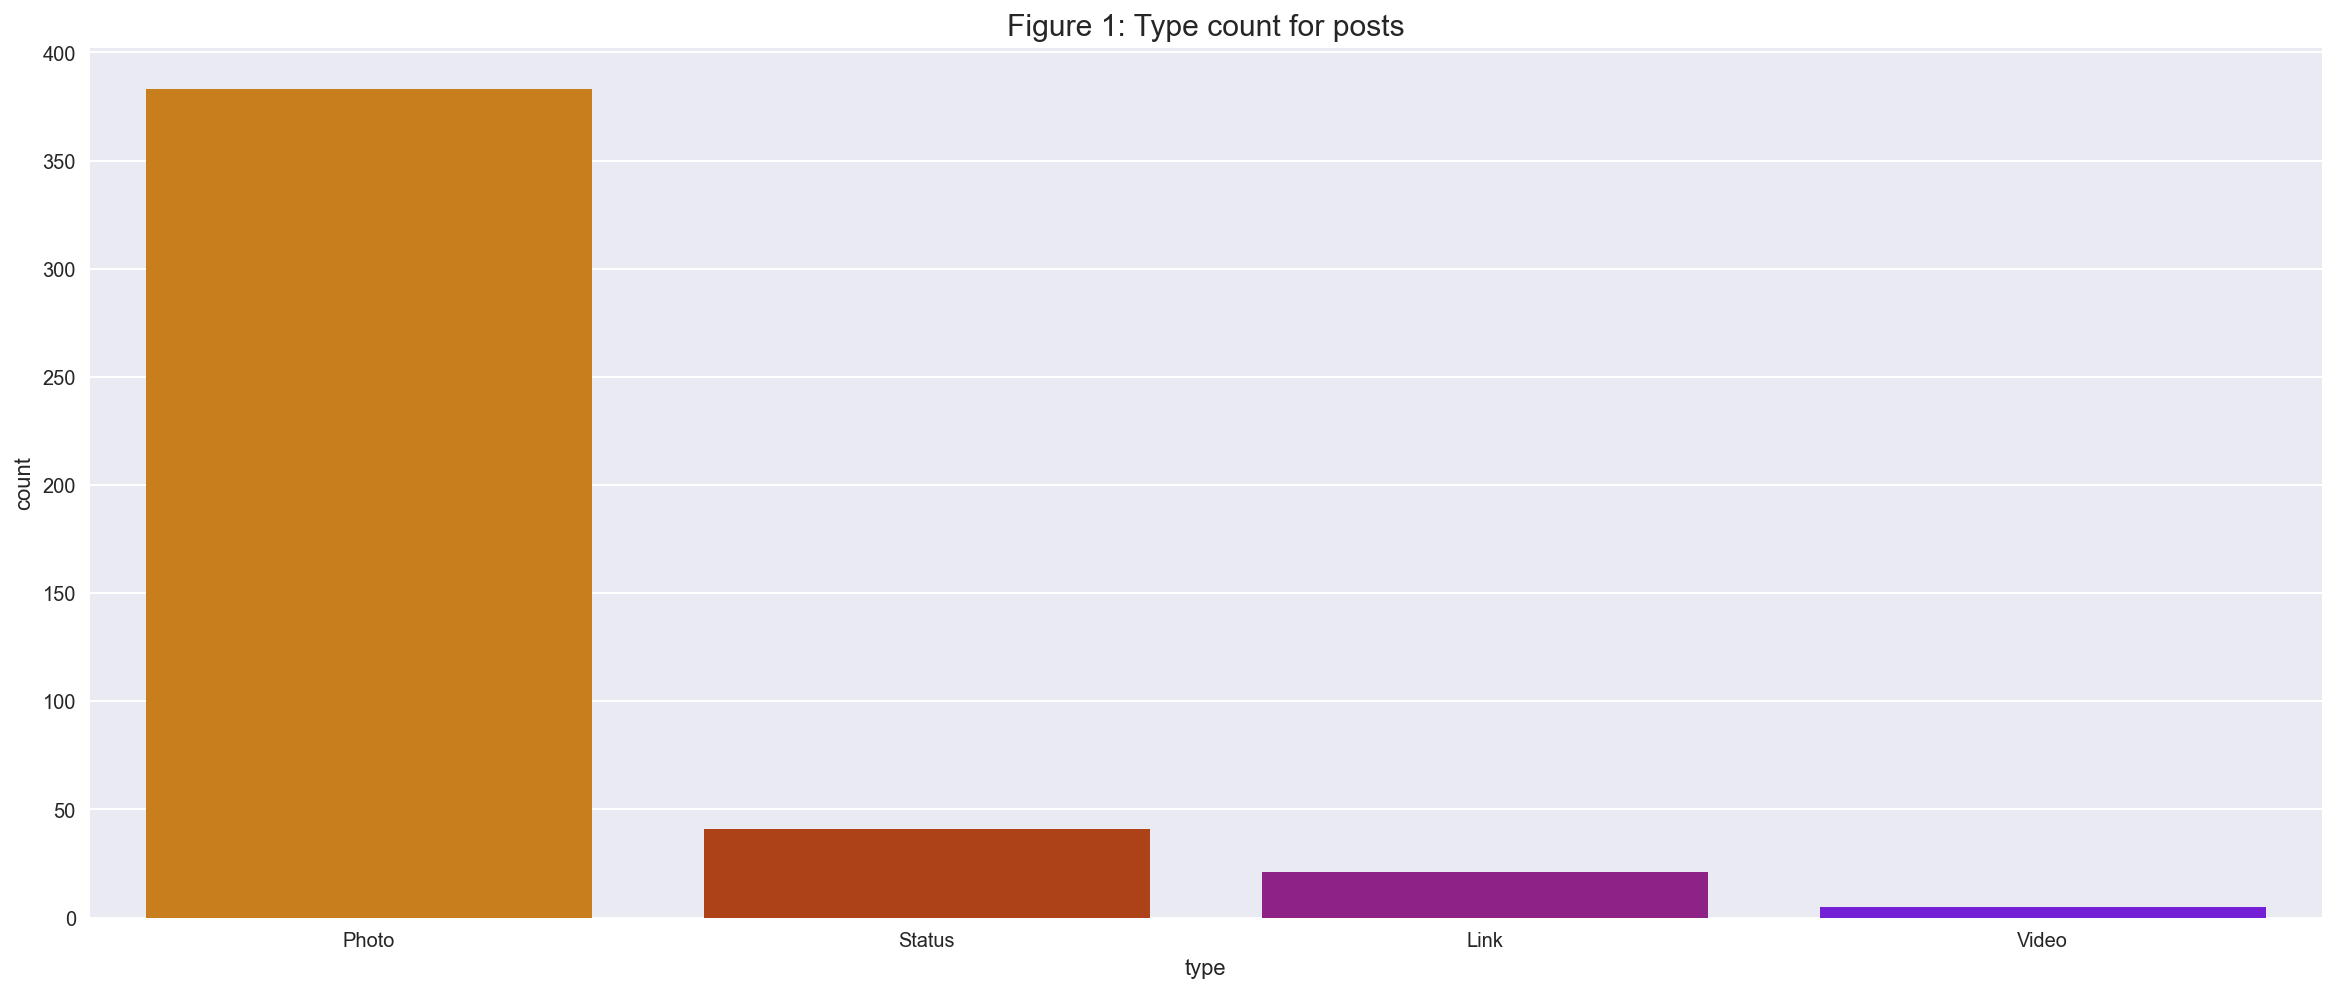

In [17]:
# Bar chart of type
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'type', data = fb_df, palette = 'gnuplot_r', 
                    order = fb_df['type'].value_counts().index)
fig = plt.title('Figure 1: Type count for posts', fontsize = 15)
plt.show()

#### Bar Chart of Month

Figure 2 displays the count of posts for each month of the year, with the most posts being published in the 10th month (October) based on the dataset. 

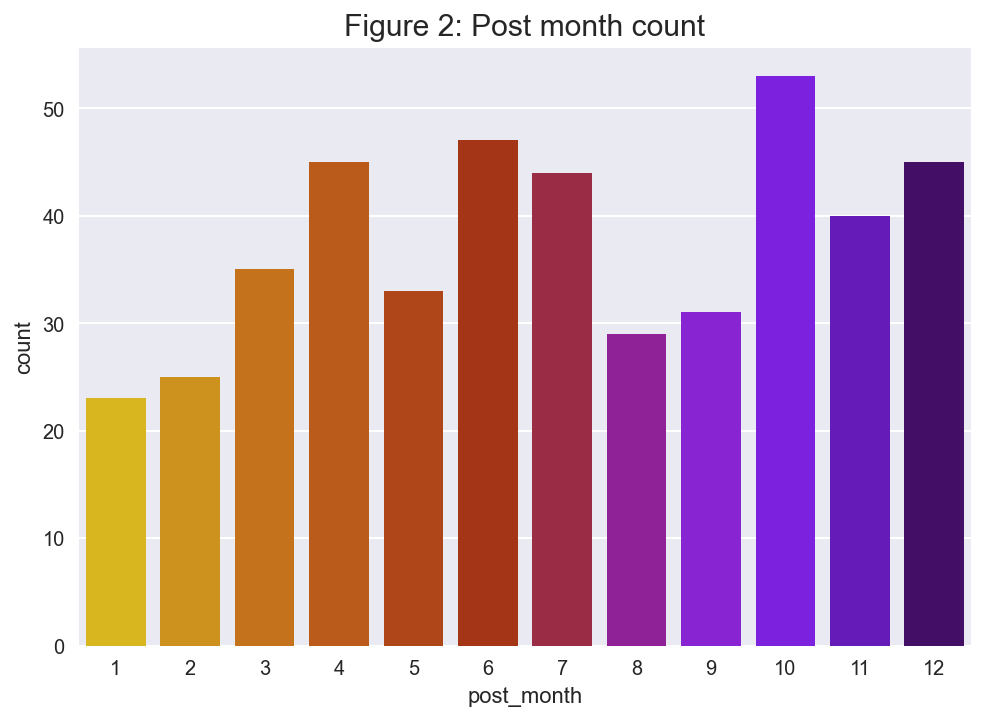

In [18]:
sns.countplot(fb_df['post_month'],palette='gnuplot_r').set_title('Figure 2: Post month count', fontsize = 15)
plt.show()

#### Boxplot & Histogram of Total Interactions

As evident in Figures 3A and 3B, the distribution of total interactions is clearly right-skewed, suggesting the need for a log transformation in phase 2 of the project.

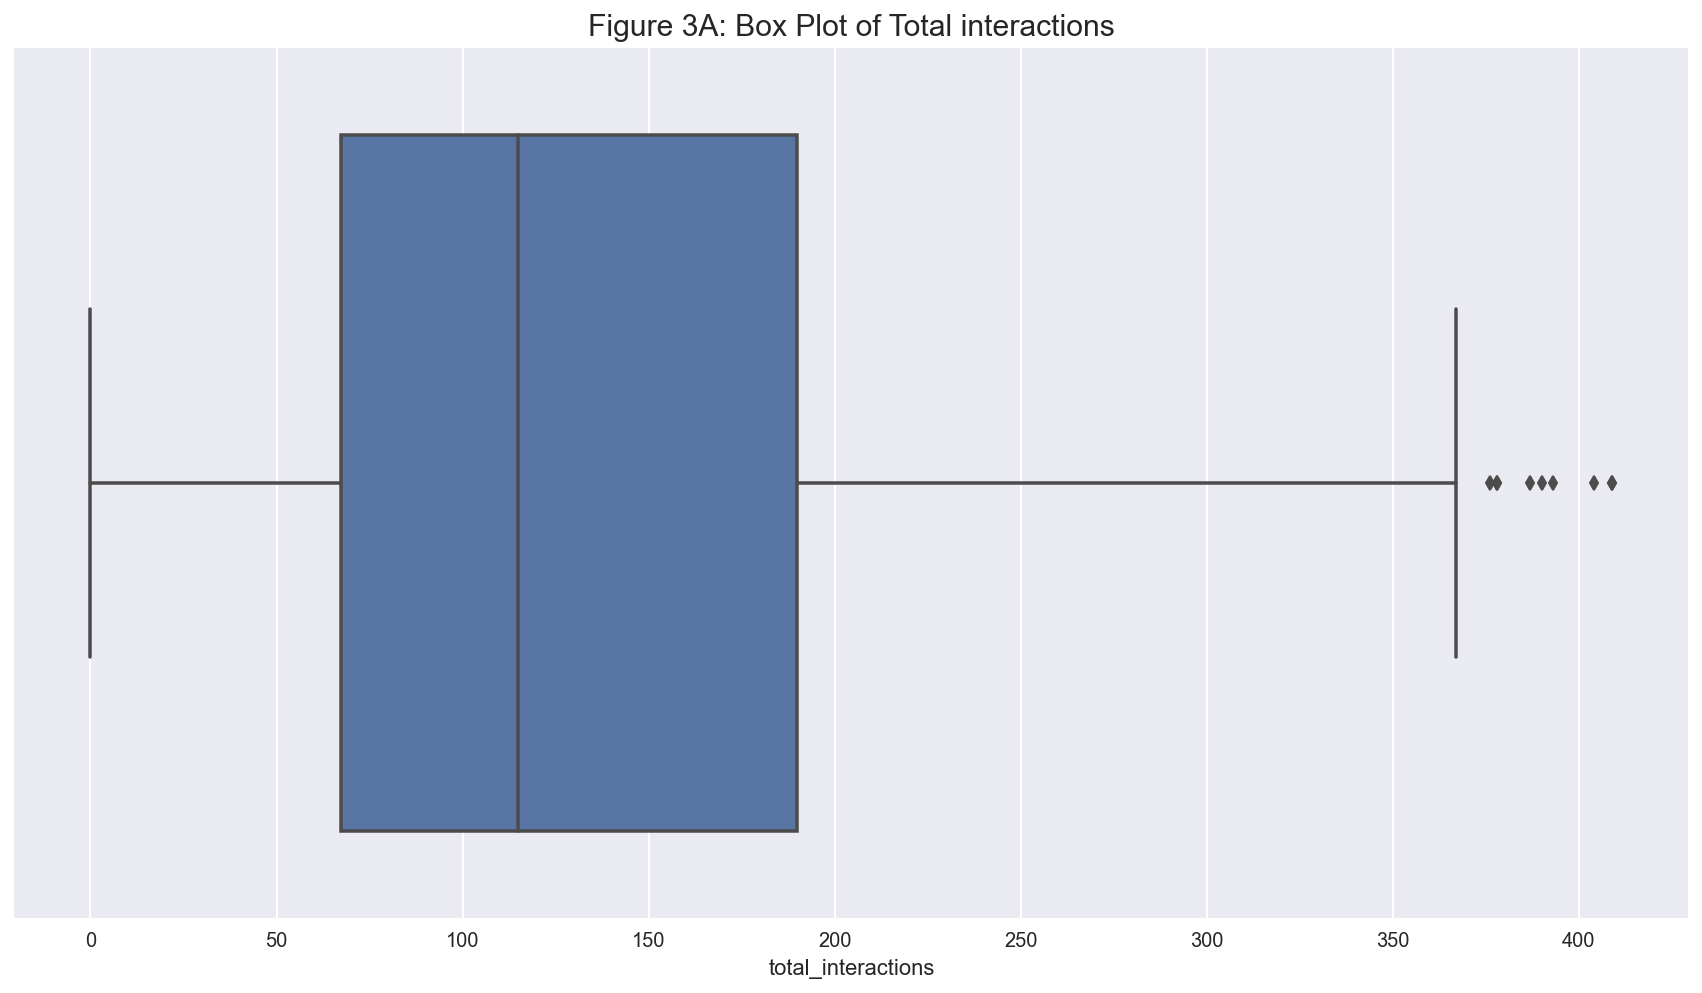

In [19]:
# Boxplot of Total interactions
plt.figure(figsize = (15,8))
sns.boxplot(fb_df['total_interactions']).set_title('Figure 3A: Box Plot of Total interactions', fontsize = 15)
plt.show();

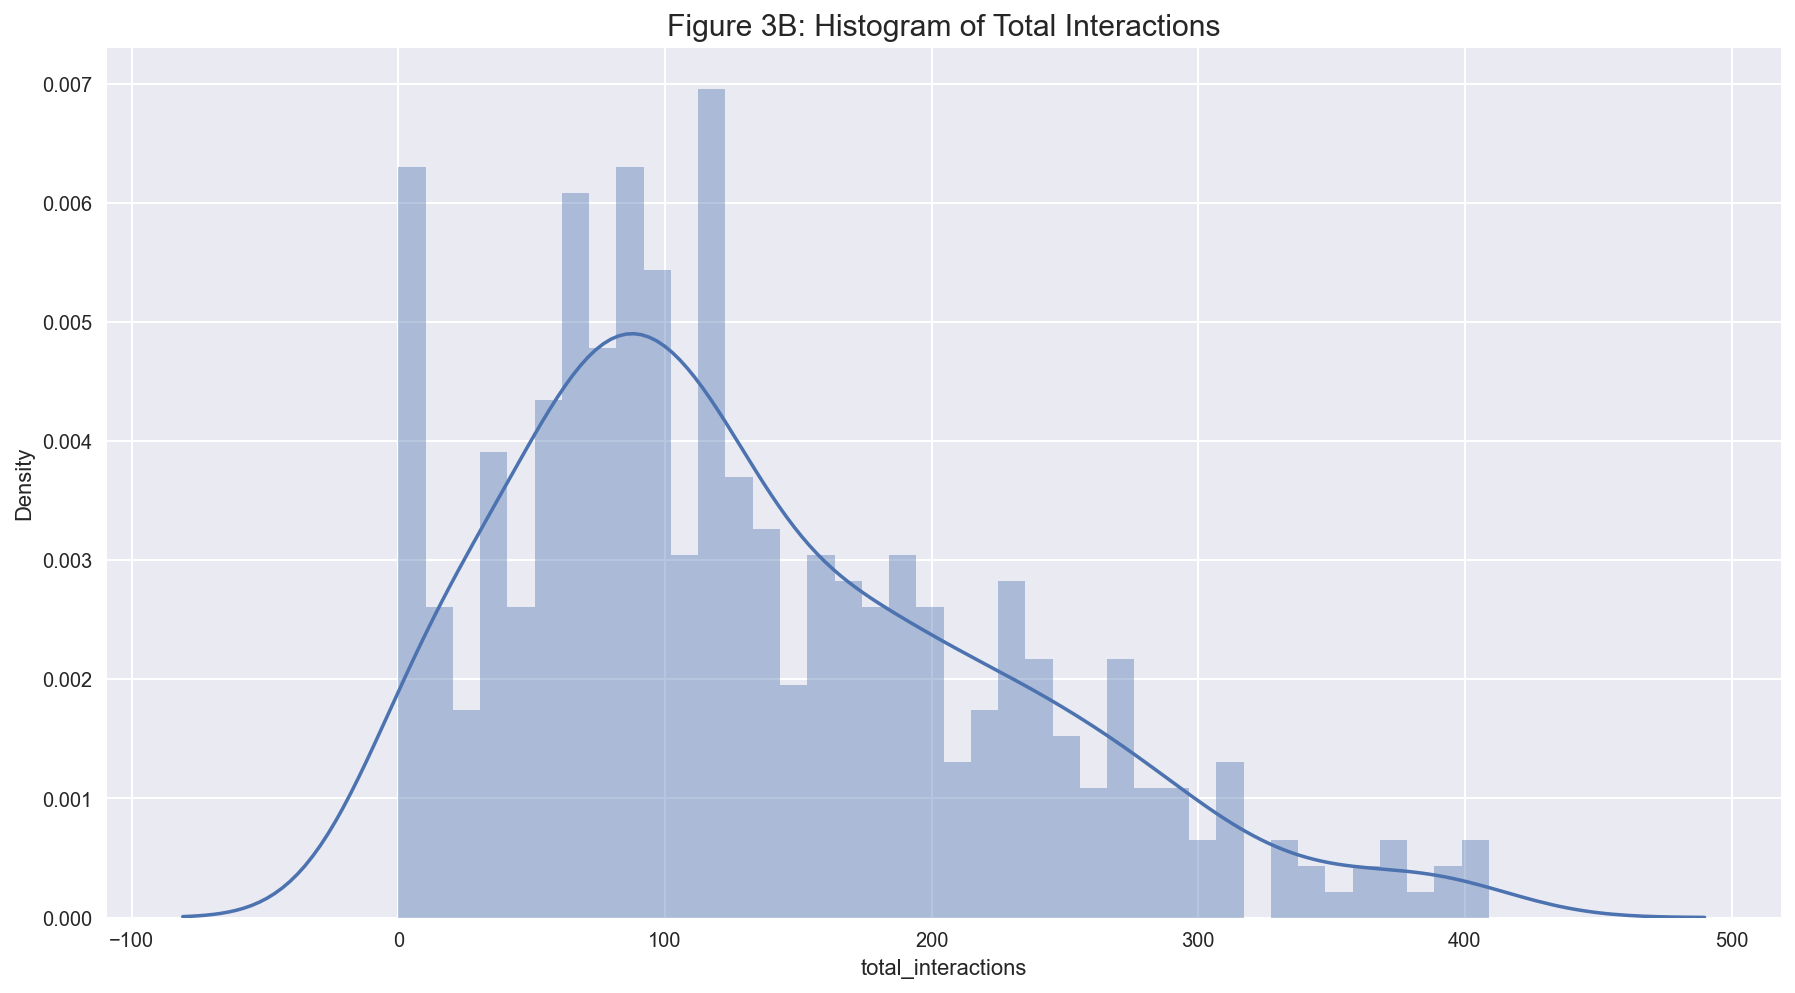

In [20]:
# Boxplot of Total Interactions
plt.figure(figsize = (15,8))
sns.distplot(fb_df['total_interactions'], kde=True, bins=40).set_title('Figure 3B: Histogram of Total Interactions', fontsize = 15)
plt.show();

### Two-Variable Visualisation

#### Boxplot of Total Interactions by Post Category

It is evident from Figure 4 that categories 2 and 3 performed similarly, while category 1 performed the worst out of the 3.

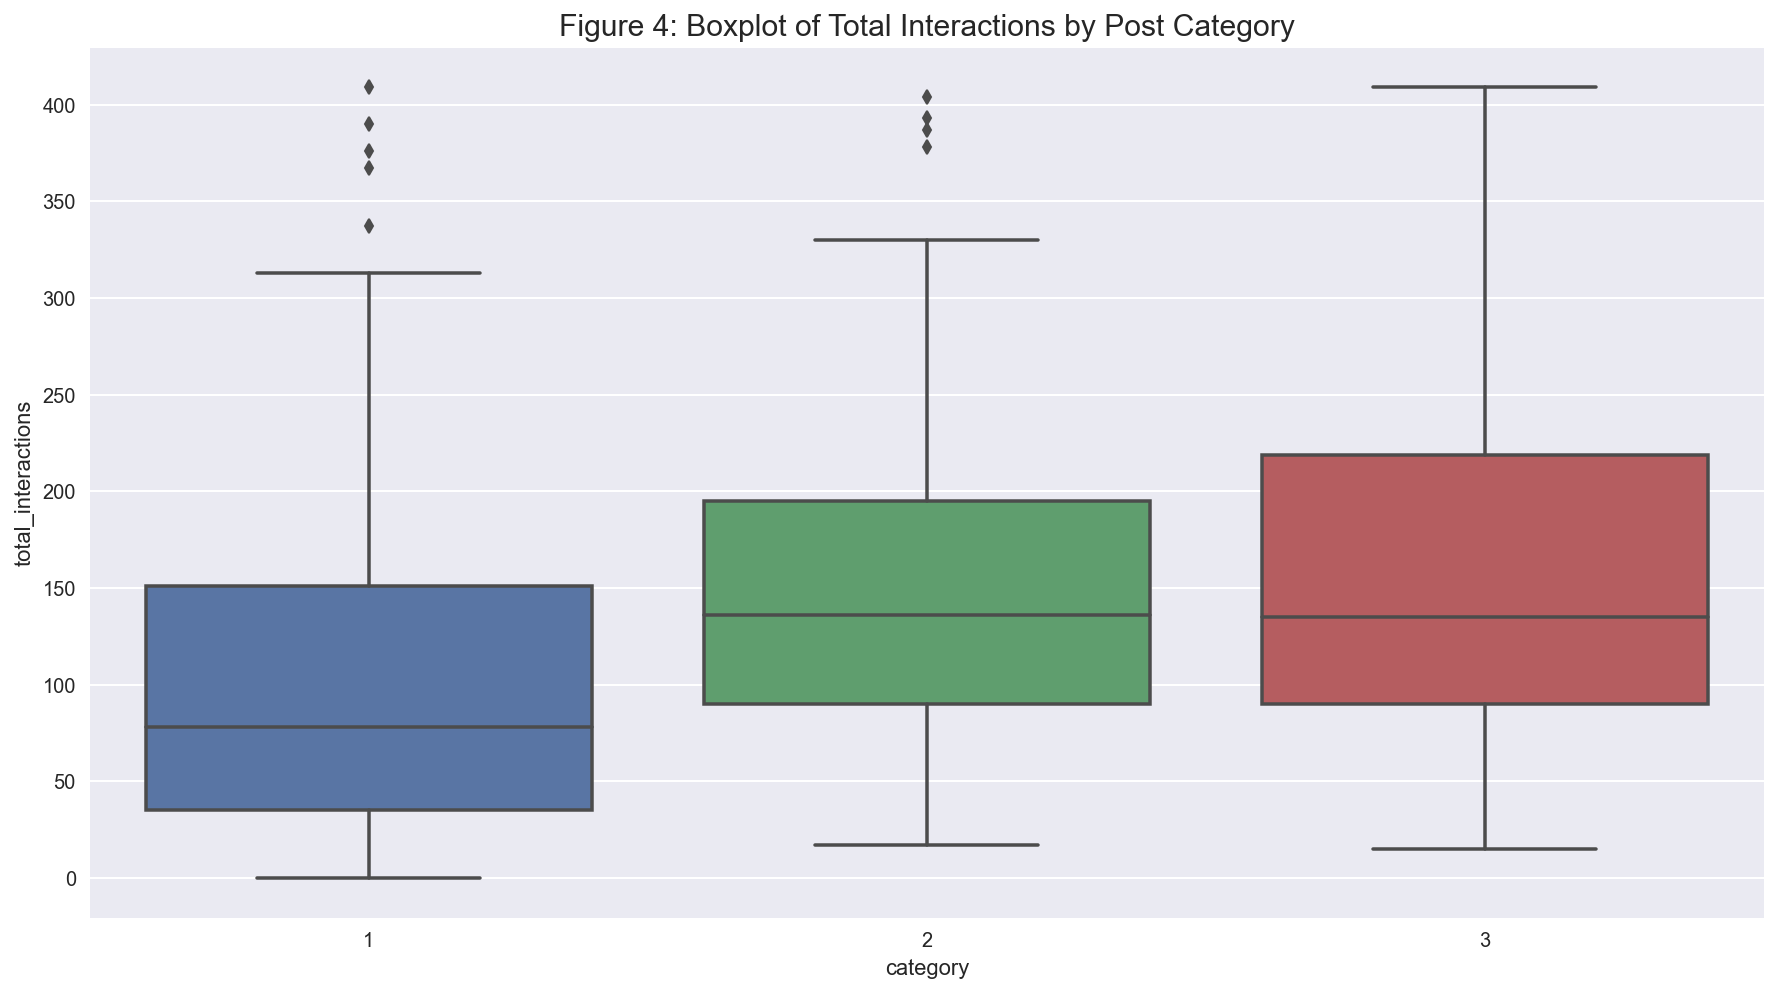

In [21]:
plt.figure(figsize = (15,8))
sns.boxplot(fb_df['category'], fb_df['total_interactions']);
plt.title('Figure 4: Boxplot of Total Interactions by Post Category', fontsize = 15)
plt.show();

#### Boxplot of Total Interactions by Post Type

In Figure 5, video and status perform similarly with photo not far behind while link performs the worst in regard to total interactions.

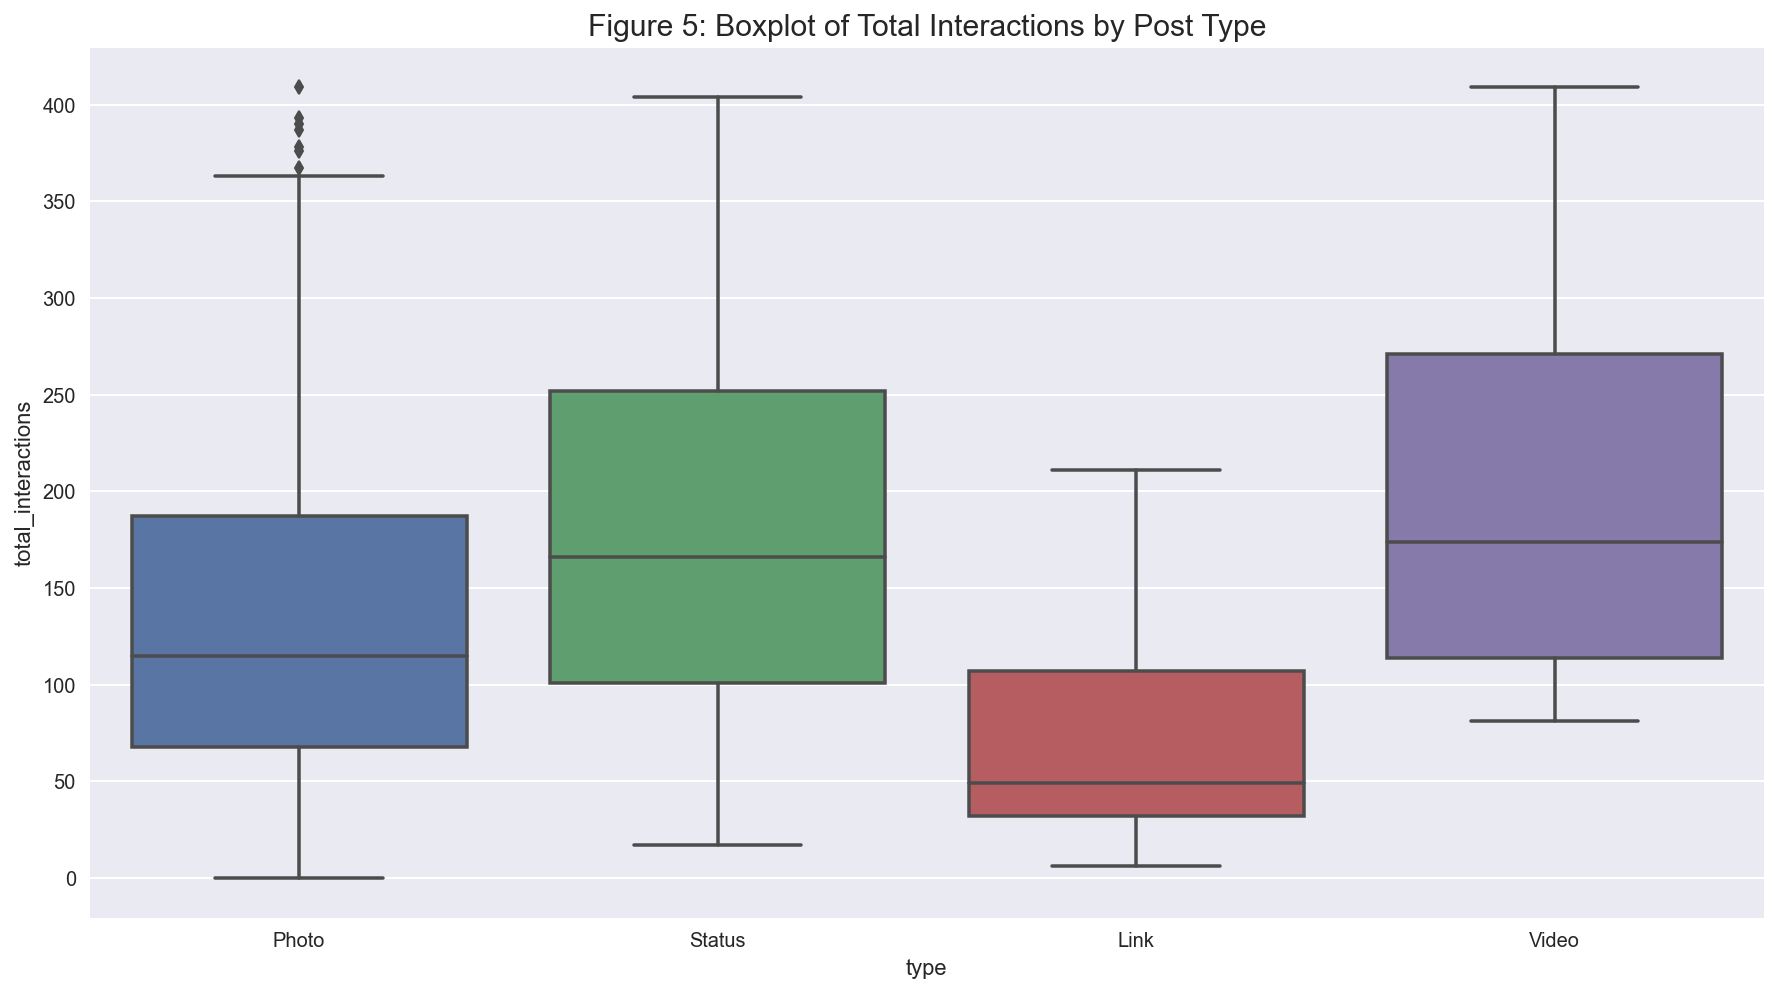

In [22]:
plt.figure(figsize = (15,8))
sns.boxplot(fb_df['type'], fb_df['total_interactions']);
plt.title('Figure 5: Boxplot of Total Interactions by Post Type', fontsize = 15)
plt.show();

### Three-Variable Visualisation

#### Boxplot of Total Interactions broken down by Post Category and Post Type

Figure 6 shows that photo and status posts perform better in categories 2 and 3 while suggesting that there is not much data present for link and video in the same categories.

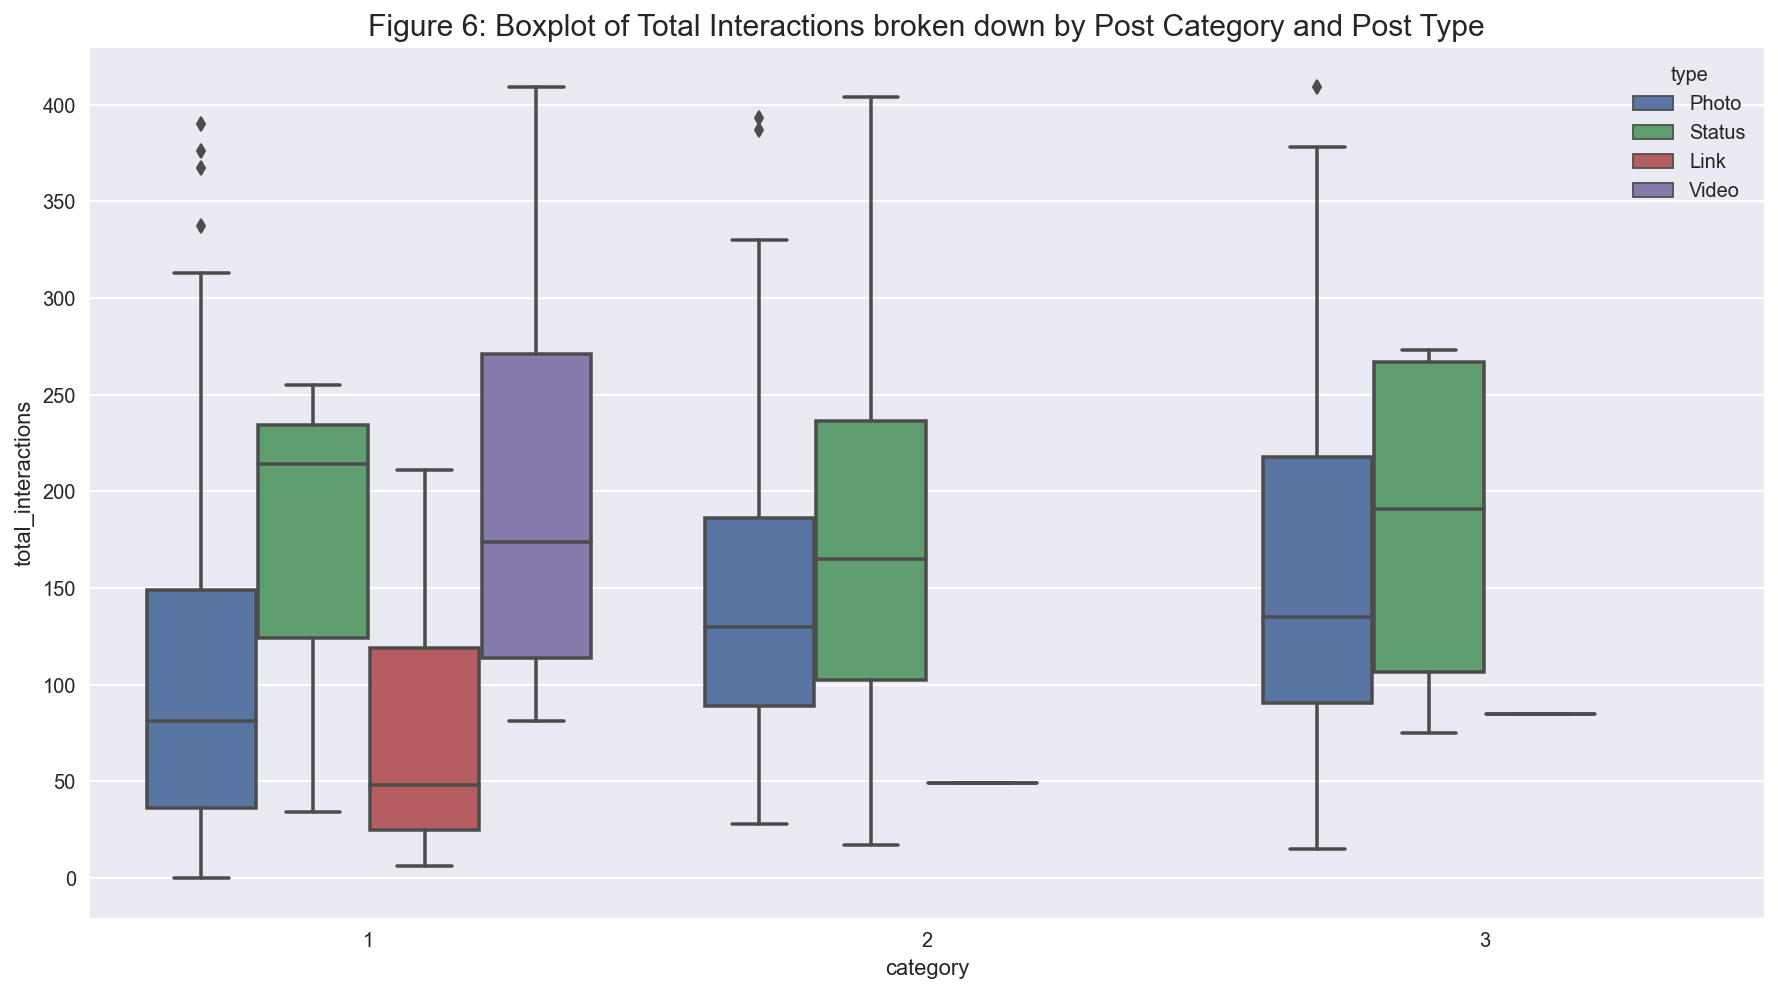

In [23]:
plt.figure(figsize = (15,8))
sns.boxplot(fb_df['category'], fb_df['total_interactions'], 
            hue = fb_df['type'])
plt.title('Figure 6: Boxplot of Total Interactions broken down by Post Category and Post Type', fontsize = 15)
plt.show();

#### Boxplot of Total Interactions broken down by Post Paid Status and Post Type

In Figure 7, photo, status, and link posts all perform better when it is a paid post rather than unpaid.

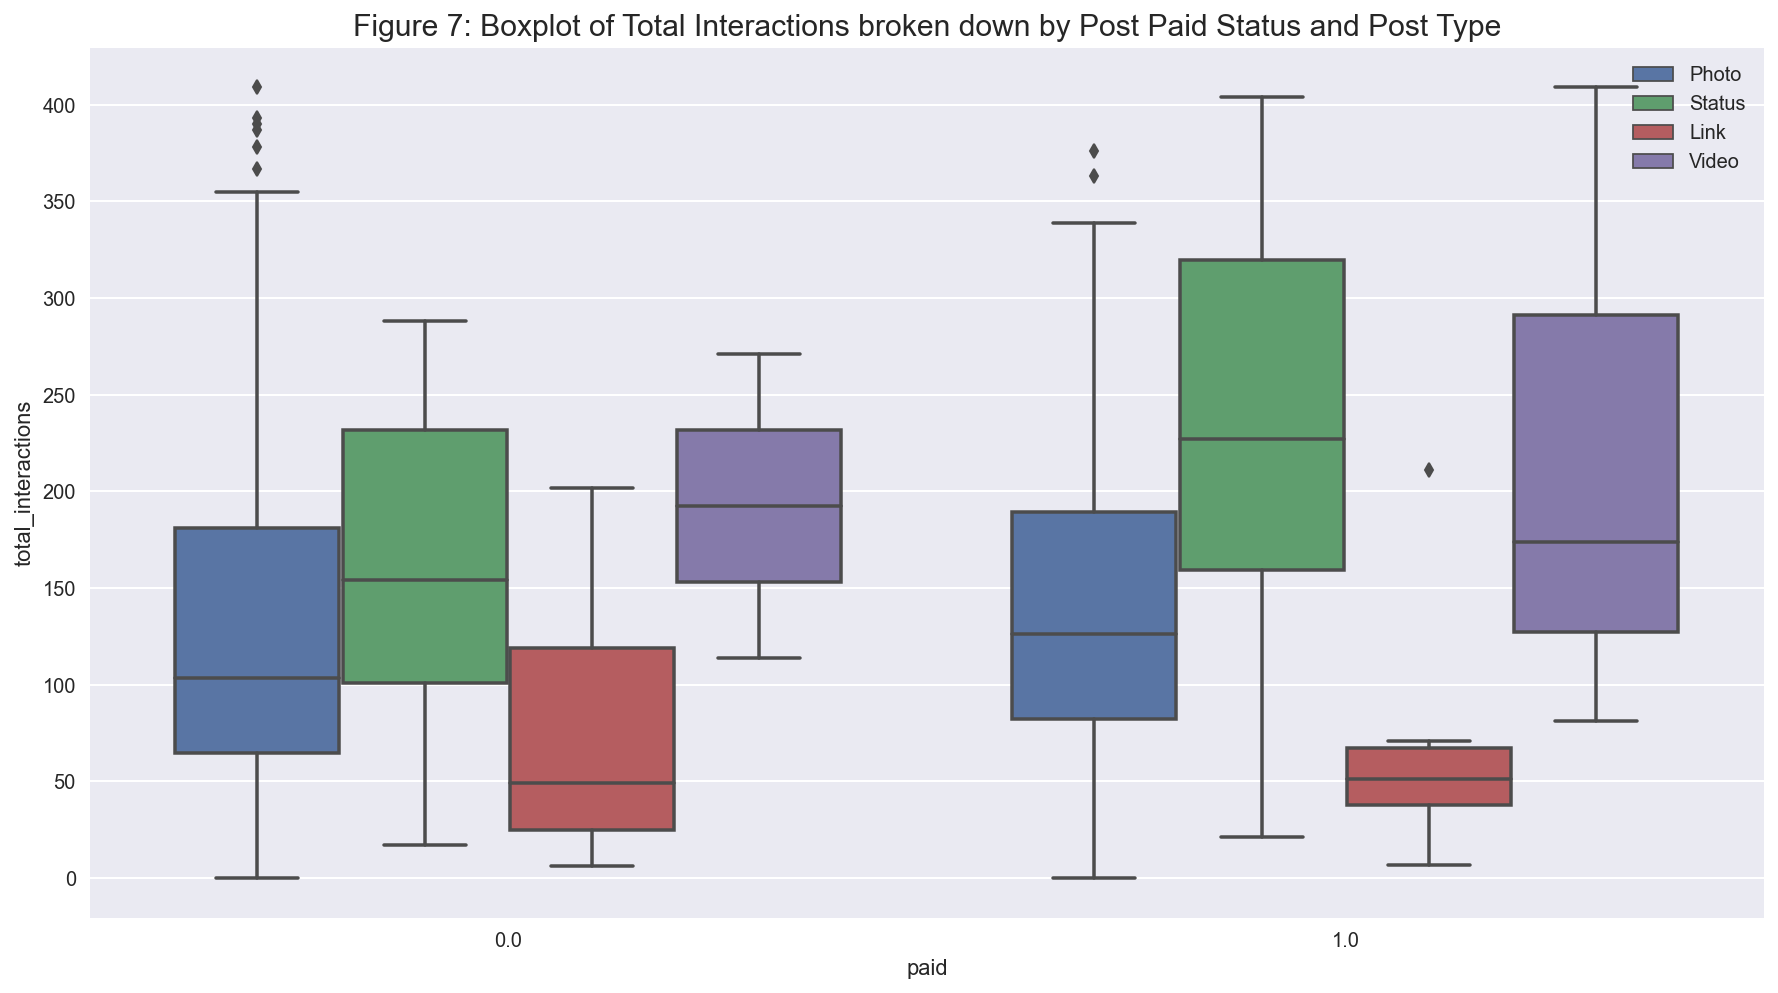

In [24]:
plt.figure(figsize = (15,8))
sns.boxplot(fb_df['paid'], fb_df['total_interactions'], hue = fb_df['type'])
plt.title('Figure 7: Boxplot of Total Interactions broken down by Post Paid Status and Post Type', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

## Summary and Conclusions

Those with a vested interest in Facebook’s post algorithm would benefit largely from an accurate prediction of total interactions a given post receives. Undisputedly, a model that could reliably predict the interactions of a post before it is even published would be paramount in maximising user engagement on the platform.  The main goal of this project is to determine if a reliable, accurate model can be constructed with the Facebook Metrics dataset in order to achieve these goals.
Data cleaning & preprocessing were conducted in phase 1 of this project in order to allow for data visualisation and, in phase 2 of the project, a machine learning model. Numerous features were dropped from the dataset, specifically the “lifetime” features as well as Comment, Like, and Share. Although the dataset was relatively cleaned already, A check was also conducted for any outliers and missing values, with the one missing value found being replaced with 0, and any of the outliers that were above the 90th percentile being dropped from the dataset. 

Data was explored through the construction of various visualisations. Photo posts are the most frequent type of post which was made possible through the use of explanatory variables. Preliminary exploration suggests that there may be a reason why some months had far more posts than others, however further analysis needs to be conducted to determine if there is a correlation. It also appears that categories 2 and 3 (product and inspiration) posts tend to perform better than category 1 (action) posts which could yield interesting results in the impact categories have on interactions. Further exploration also showed that when the cosmetic brand paid Facebook advertising to promote their post further, the post performed slightly better than the unpaid variant, suggesting that since it is Facebook’s algorithm, they can manipulate it in order for it to be seen by more users.

Aspects of the numerical data was also found to be right-skewed, namely the target feature, Total Interactions. This will need to be rectified in phase 2 of the project to address the issue. So far, it appears post type, post category, and paid status are the most influential features in determining total interactions. Justifying further relationships will require additional analysis to be conducted.

## References

- Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research (UCI). Retrieved April 09, 2022 from https://archive.ics.uci.edu/ml/datasets/Facebook+metrics